# I-values for the 3 main models

Go to [Index](response_Witz2019_index.ipynb).

In this notebook we compare the I-values for the 3 models:
* GW: initiation-centric model from Witz *et al* (2019).
* SLT: division-centric model from Si & Le Treut *et al* (2019).
* HC: Helmstetter-Cooper model.

The methods used to process experimental data and to compute the I-values are the same as in the [determinant analysis](response_Witz2019_determinant_analysis.ipynb). The only difference resides in that all I-values for each dataset are computed from the ensemble of cells (ensemble such that all variables considered here are defined). Compared to the determinant analysis mentionned above, it only changes (slightly) the I-values for the Helmstetter-Cooper model, the other 2 remaining unchanged.

We have performed the analysis defining models with only 3 variables. We provided a section to uncomment to perform the same analysis with models defined with 4 variables. Qualitatively, the results remain essentially the same.

The experimental data files used were generated in the notebooks [response_Witz2019_process_witz_data](response_Witz2019_process_witz_data.ipynb) and [response_Witz2019_import_junlab_data](response_Witz2019_import_junlab_data.ipynb).

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Imports

In [2]:
import os, copy, pickle, itertools, tabulate
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'   # to export text as text, not curves
from IPython.display import Image

import sys
sys.path.append('code')
from functions_response import add_allvariables, compute_determinant, plot_Ivalues_main_models, plot_Ivalues, plot_Ivalues_all, plot_Ivalues_all_overlay, load_table, process_gw

## Parameters

In [3]:
# 3 variables
combinations = [\
                 ['lambda', 'delta_ii', 'delta_id'], \
                 ['lambda', 'Delta_bd', 'delta_ii'], \
                 ['lambda', 'tau_cyc', 'Lambda_i'] \
               ]

# 4 variables
# uncomment to do the analysis with 4-variable models
# combinations = [\
#                  ['lambda', 'delta_ii', 'delta_id', 'Lambda_i'], \
#                  ['lambda', 'Delta_bd', 'delta_ii', 'Sb'], \
#                  ['lambda', 'tau_cyc', 'Lambda_i', 'Sb'] \
#                ]

ucombinations = list(np.unique(np.ravel(combinations)))
labels = ['GW', 'SLT', 'HC']
colors = ['darkblue', 'darkgreen', 'darkred']

ext_list = ['.png','.svg']

direxp = os.path.join('.','experiments')
# create/declare export directory for figures
fig_dir = os.path.join('figures')
if not os.path.isdir(fig_dir):
    os.makedirs(fig_dir)
    
names_all = []

In [4]:
results = []
headers = ['name'] + labels + ['npts']

## Perform determinant analysis on experimental data from Si & Le Treut et al (2019) and Le Treut & Si & Li et al(2020)

In [5]:
names = ['mg1655_acetate', \
         'mg1655_glucose', \
         'mg1655_glycerol11aa', \
         'ncm3722_arginine', \
         'ncm3722_glucose', \
         'ncm3722_glucose12aa', \
         'bw25113_glucose', \
         'bw25113_glucose_uracil', \
         'mg1655_acetate_uracil' , \
         'mg1655_glycerol6aa_uracil', \
         'mg1655_glucose_uracil', \
         'jh642_mannose'
        ]

for name in names:
    fpath = os.path.join(direxp,name,'colidata.pkl')
    print(name, fpath)
    if not name in names_all:
        names_all.append(name)
    outputdir = os.path.join(direxp,name)
#     print(fpath)
    
    colidata = pd.read_pickle(fpath)

    colidata['lambda'] = colidata['lambda']*60
    ncells = len(colidata)
    print("ncells = {:d}".format(ncells))
    
    ncells = len(colidata['Lambda_i'].dropna())
    print("ncells (initiation picked) = {:d}".format(ncells))

    ncells = len(colidata.dropna())
    print("ncells (full information) = {:d}".format(ncells))
    
    # determinant analysis
    idx = colidata.loc[:,ucombinations].dropna().index
    npts = len(idx)
    table = [name]
    for comb in combinations:
        data = colidata.loc[idx,list(comb)].to_numpy().astype('float64').T
        I = compute_determinant(data)
        table += [I] 
    table += [npts]
    results.append(table)

mg1655_acetate ./experiments/mg1655_acetate/colidata.pkl
ncells = 1554
ncells (initiation picked) = 1554
ncells (full information) = 680
mg1655_glucose ./experiments/mg1655_glucose/colidata.pkl
ncells = 1807
ncells (initiation picked) = 1807
ncells (full information) = 1478
mg1655_glycerol11aa ./experiments/mg1655_glycerol11aa/colidata.pkl
ncells = 1491
ncells (initiation picked) = 1491
ncells (full information) = 933
ncm3722_arginine ./experiments/ncm3722_arginine/colidata.pkl
ncells = 1701
ncells (initiation picked) = 1701
ncells (full information) = 925
ncm3722_glucose ./experiments/ncm3722_glucose/colidata.pkl
ncells = 1432
ncells (initiation picked) = 1432
ncells (full information) = 854
ncm3722_glucose12aa ./experiments/ncm3722_glucose12aa/colidata.pkl
ncells = 1464
ncells (initiation picked) = 1464
ncells (full information) = 522
bw25113_glucose ./experiments/bw25113_glucose/colidata.pkl
ncells = 499
ncells (initiation picked) = 499
ncells (full information) = 499
bw25113_glucos

## Perform determinant analysis on experimental data from Sauls et al (2020)

In [6]:
names = [
         '3610_gly', \
         '3610_man', \
         '3610_suc' \
        ]

for name in names:
    fpath = os.path.join(direxp,name,'colidata.pkl')
    print(name, fpath)
    if not name in names_all:
        names_all.append(name)
    outputdir = os.path.join(direxp,name)
#     print(fpath)
    
    colidata = pd.read_pickle(fpath)

    colidata['lambda'] = colidata['lambda']*60
    ncells = len(colidata)
    print("ncells = {:d}".format(ncells))
    
    ncells = len(colidata['Lambda_i'].dropna())
    print("ncells (initiation picked) = {:d}".format(ncells))

    ncells = len(colidata.dropna())
    print("ncells (full information) = {:d}".format(ncells))
    
    # determinant analysis
    idx = colidata.loc[:,ucombinations].dropna().index
    npts = len(idx)
    table = [name]
    for comb in combinations:
        data = colidata.loc[idx,list(comb)].to_numpy().astype('float64').T
        I = compute_determinant(data)
        table += [I] 
    table += [npts]
    results.append(table)

3610_gly ./experiments/3610_gly/colidata.pkl
ncells = 2355
ncells (initiation picked) = 514
ncells (full information) = 191
3610_man ./experiments/3610_man/colidata.pkl
ncells = 5478
ncells (initiation picked) = 504
ncells (full information) = 149
3610_suc ./experiments/3610_suc/colidata.pkl
ncells = 2530
ncells (initiation picked) = 506
ncells (full information) = 277


## Perform determinant analysis on experimental data from Witz et al (2019)

In [7]:
# parameters
names = [
         'glycerol', \
         'glucose', \
         'glucose8a', \
         'glycerolauto' \
        ]

# data exported by Witz et al.
fpath=os.path.join('..','Data_export','Fig1_2_3.csv')
df_export = pd.read_csv(fpath)
names_export = df_export['condition'].unique().tolist()
match_export = False   # set True to match exported_data in following analysis
dec = 4               # decimals when rounding up lambda_inv for mapping

In [8]:
# load files
# names=['glucose8a']
for name in names:
    fpath = os.path.join(direxp,name,'colidata.pkl')
    print(name, fpath)
    if not name in names_all:
        names_all.append(name)
    outputdir = os.path.join(direxp,name)
#     print(fpath)
    
    colidata = pd.read_pickle(fpath)

    colidata['lambda'] = colidata['lambda']*60
    ncells = len(colidata)
    print("ncells = {:d}".format(ncells))

    # filter data
    ncells = len(colidata)
    print("ncells (pre-filter) = {:d}".format(ncells))
    
    ## with reference data set
    if match_export and (name in names_export):
        df_ref = df_export.loc[df_export['condition'] == name]
        set_ref = set(df_ref['lambda_inv'].dropna().round(dec).unique().tolist())
        set_data = set(colidata['tau_eff'].dropna().round(dec).unique().tolist())
        selection = list(set_data.intersection(set_ref))
        idx = colidata['tau_eff'].round(dec).isin(selection)
        colidata.drop(colidata.index[~idx], axis=0, inplace=True)
        
    ncells = len(colidata)
    print("ncells (post-filter) = {:d}".format(ncells))

    ncells = len(colidata['Lambda_i'].dropna())
    print("ncells (initiation picked) = {:d}".format(ncells))

    ncells = len(colidata.dropna())
    print("ncells (full information) = {:d}".format(ncells))

    # determinant analysis
    idx = colidata.loc[:,ucombinations].dropna().index
    npts = len(idx)
    table = [name]
    for comb in combinations:
        data = colidata.loc[idx,list(comb)].to_numpy().astype('float64').T
        I = compute_determinant(data)
        table += [I] 
    table += [npts]
    results.append(table)

glycerol ./experiments/glycerol/colidata.pkl
ncells = 865
ncells (pre-filter) = 865
ncells (post-filter) = 865
ncells (initiation picked) = 811
ncells (full information) = 422
glucose ./experiments/glucose/colidata.pkl
ncells = 1094
ncells (pre-filter) = 1094
ncells (post-filter) = 1094
ncells (initiation picked) = 994
ncells (full information) = 523
glucose8a ./experiments/glucose8a/colidata.pkl
ncells = 1251
ncells (pre-filter) = 1251
ncells (post-filter) = 1251
ncells (initiation picked) = 1118
ncells (full information) = 571
glycerolauto ./experiments/glycerolauto/colidata.pkl
ncells = 3018
ncells (pre-filter) = 3018
ncells (post-filter) = 3018
ncells (initiation picked) = 2510
ncells (full information) = 875


## Save results and make figure

In [9]:
outputdir = os.path.join(fig_dir, 'Ivalues_comparisons')
if not os.path.isdir(outputdir):
    os.makedirs(outputdir)
    
fname = 'main_models'
fpath = os.path.join(outputdir,fname + '.txt')

with open(fpath,'w') as fout:
    fout.write(tabulate.tabulate(results, tablefmt='plain', headers=headers))

In [10]:
# plot the main models scores
fname = 'main_models'
fpath = os.path.join(outputdir,fname + '.txt')
table = load_table(fpath, skiprows=0)

table = [line[:4] for line in table]  # do not pass the number of points
fig = plot_Ivalues_main_models(table, figsize=(8,4), colors=colors)

fname = 'main_models'
fpath = os.path.splitext(fpath)[0]
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

Saved figure in figures/Ivalues_comparisons/main_models.png
Saved figure in figures/Ivalues_comparisons/main_models.svg


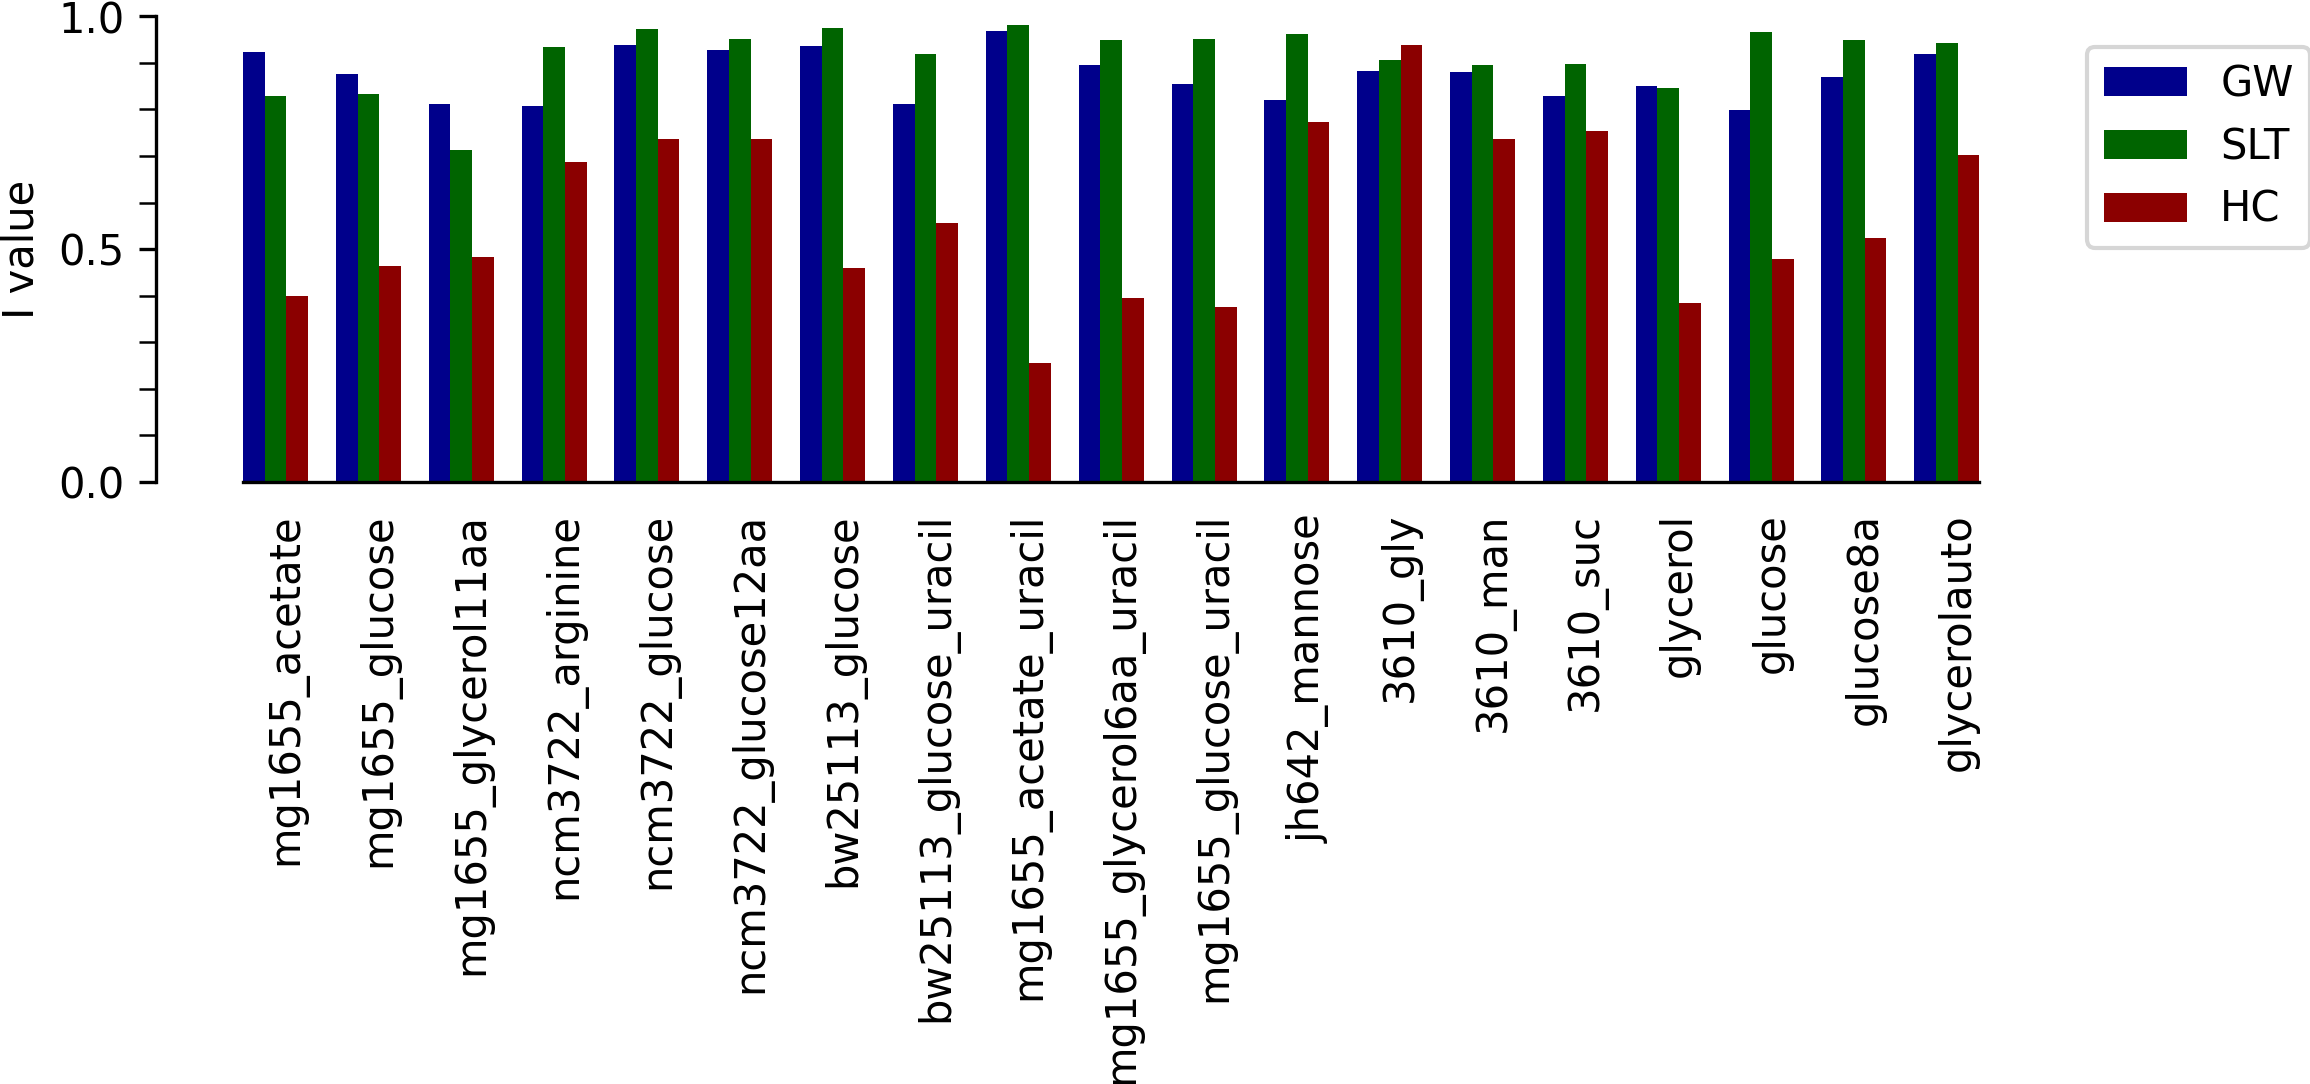

In [11]:
fname = 'main_models'
fpath = os.path.join(outputdir,fname + '.png')
# display one of the previous figures
Image(filename=fpath) 